#### ***DOWNLOADING DATA FROM KAGGLE FOR ANALYSIS***

In this Python project I will be utilizing a Kaggle API token to download a zip file from Kaggles website. I will then unzip that file and extract all of its content, and store it into a pandas dataframe. From there I will clean the data (if necessary) and analyze the data to answer the questions associated with the project. This dataset contains 2022 and 2023 global sales data.

RECOMMENDED ANALYSIS:
1) Find the top 10 highest revenue generating products.
2) Find the top 5 selling products in each region.
3) Find month over month growth comparison for 2022 and 2023 sales.
4) For each category, which month had the highest sales.
5) Which sub category had the highest growth by profit in 2023 compared to 2022?

###### (Dataset retrieved from Kaggle)

The first thing I will need to do is import the proper modules for analysis and set my desired options for viewing the data and creating visuals.

###### **Importing libraries and setting options**

In [1]:
import numpy as np  # for numerical computations
import pandas as pd     # for reading in data and data manipulation
pd.set_option("display.max_rows", None) # for personal preference to display all rows
pd.set_option("display.max_columns", None)  # for personal preference to display all columns
import matplotlib.pyplot as plt     # for visualizations
%matplotlib inline  
from matplotlib import style    # to set the style of visuals
style.use("ggplot")     # setting the style 
import seaborn as sns   # for enhanced visuals
sns.set_style("darkgrid")   # setting the style of visuals
import os   # to search working directory for files

**DATA IMPORTING:**

Now I will import the Kaggle module so I can download the desired dataset from the website.

###### **Downloading data from kaggle**

In [2]:
import kaggle   # to reach desired website

In [32]:
!kaggle datasets download ankitbansal06/retail-orders  # retrieving dataset from website

usage: kaggle [-h] [-v] [-W]
              {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
              ...
kaggle: error: unrecognized arguments: # retrieving dataset from website


Now I will import a library that allows me retrieve the zipped file that I downloaded from Kaggle and unzip it.

###### **Downloading the zip file and unpackaging the file**

In [30]:
import zipfile  # for utilizing zip packages to extract data from files
zip_ref = zipfile.ZipFile("retail-orders.zip")  # creating a reference for the file name
zip_ref.extractall()    # extracting the file to my directory
zip_ref.close()     # closing the file

Now I will search my directory to find the file that I have just downloaded from Kaggle and unzipped.

###### **Checking my current working directory**

In [29]:
os.getcwd()     # checking which directory I am currently in

'c:\\Users\\mjaso\\OneDrive'

Now I will check for the file that I will be using for this analysis in this directory.

###### **Searching for file for analysis**

In [6]:
os.listdir('c:\\Users\\mjaso\\OneDrive')    # listing the files in the directory

['.849C9593-D756-4E56-8D6E-42412F2A707B',
 '.cef-dev-tools-size.vdf',
 '.crash',
 '.wdc',
 '1000_Companies.csv',
 'ALL Portfolio Projects',
 'Analysis PDF',
 'aom.dll',
 'apprenticeship answers.docx',
 'apprenticeship_answers.docx',
 'Apps',
 'archive (3)',
 'BankCustomerChurnSqlProject.sql',
 'CafeRewardsOffersPyProject.ipynb',
 'carsales.csv',
 'CausesOfDeath_France_2001-2008.csv',
 'Certificates',
 'chicago crime project visual.jpg',
 'ChicagoAccidentPyProject.ipynb',
 'ChicagoAccidentSQLProject.sql',
 'ChicagoCrimeData',
 'ChicagoTrafficCrashes.xlsx',
 'ChicagoTrafficCrashesPBIProject.pbix',
 'ChicagoTrafficCrashesPyProject.ipynb',
 'ChicagoTrafficCrashesSqlProject.sql',
 'Chicago_Traffic_Crashes.csv',
 'Chicago_Traffic_Crashes.xlsx',
 'Chicago_Traffic_Crashes_.csv',
 'ChiCrimeExploratoryAnalysisPC.ipynb',
 'Coffee Shop Sales Project.xlsx',
 'Coffee Shop Sales.csv',
 'CoffeeShopPyProject.ipynb',
 'CoffeeShopSqlProject.sql',
 'Completed Portfolio Projects',
 'ComplexQueriesTest1.sql

I have found the file that I am looking for, now I will read that file into a pandas dataframe.

###### **Reading data into a pandas df**

In [7]:
orders = pd.read_csv('c:\\Users\\mjaso\\OneDrive\\orders.csv')  # creating a dataframe for the data

**DATA EXAMINATION:**

The file has been read into a pandas dataframe and to ensure that the data has been imported without any errors, I will check the first and last 5 rows of the dataframe to ensure accuracy and consistency.

###### **Checking the first 5 rows of data**

In [8]:
orders.head()   # viewing the first 5 rows of data

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [9]:
orders.tail()   # viewing the last 5 rows of data

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,30,30,3,4
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,70,90,2,4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,220,260,2,2
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,30,30,4,3
9993,9994,2022-07-17,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,OFF-AP-10002684,210,240,2,3


Now I will check the dataframe to make sure there are no duplicate rows of data.

###### **Checking for duplicate rows of data**

In [10]:
duplicated_rows = orders.duplicated().sum()     # storing the value for the sum of duplicated rows of data in a variable
print(f"This dataframe has {duplicated_rows} duplicated rows of data.")     # printing the results of the variable

This dataframe has 0 duplicated rows of data.


I will now check how many rows and columns this dataframe has.

###### **Checking the shape of df**

In [11]:
r = orders.shape[0]     # storing the count of rows in a variable by slicing 
c = orders.shape[1]     # storing the count of columns in a variable by slicing 
print(f"There are {r} rows and {c} columns of data in this dataframe.")     # using the print function to display the number of rows and columns

There are 9994 rows and 16 columns of data in this dataframe.


I will now check the count of unique and null values in each column of the dataframe.

###### **Checking count of unique and null values**

In [12]:
for u in orders.columns:    # using a for loop to iterate through the df's columns
    u_val = orders[u].nunique()     # returning the number of unique values per column and storing the results in a variable
    print(f"There are {u_val} unique values in the column {u}.")    # displaying the results by using the print function

There are 9994 unique values in the column Order Id.
There are 730 unique values in the column Order Date.
There are 6 unique values in the column Ship Mode.
There are 3 unique values in the column Segment.
There are 1 unique values in the column Country.
There are 531 unique values in the column City.
There are 49 unique values in the column State.
There are 631 unique values in the column Postal Code.
There are 4 unique values in the column Region.
There are 3 unique values in the column Category.
There are 17 unique values in the column Sub Category.
There are 1862 unique values in the column Product Id.
There are 280 unique values in the column cost price.
There are 289 unique values in the column List Price.
There are 14 unique values in the column Quantity.
There are 4 unique values in the column Discount Percent.


In [13]:
for n in orders.columns:    # using a for loop to iterate through the df's columns
    n_val = orders[n].isnull().sum()    # returning the number of null values in each column and storing the results in a variable
    print(f"The column {n} has {n_val} null values.")   # using the print function to display the results

The column Order Id has 0 null values.
The column Order Date has 0 null values.
The column Ship Mode has 1 null values.
The column Segment has 0 null values.
The column Country has 0 null values.
The column City has 0 null values.
The column State has 0 null values.
The column Postal Code has 0 null values.
The column Region has 0 null values.
The column Category has 0 null values.
The column Sub Category has 0 null values.
The column Product Id has 0 null values.
The column cost price has 0 null values.
The column List Price has 0 null values.
The column Quantity has 0 null values.
The column Discount Percent has 0 null values.


Now I will check the datatypes for each column to ensure that they are in the correct format. 

###### **Checking the dtypes of columns**

In [14]:
orders.info()   # checking the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order Id          9994 non-null   int64 
 1   Order Date        9994 non-null   object
 2   Ship Mode         9993 non-null   object
 3   Segment           9994 non-null   object
 4   Country           9994 non-null   object
 5   City              9994 non-null   object
 6   State             9994 non-null   object
 7   Postal Code       9994 non-null   int64 
 8   Region            9994 non-null   object
 9   Category          9994 non-null   object
 10  Sub Category      9994 non-null   object
 11  Product Id        9994 non-null   object
 12  cost price        9994 non-null   int64 
 13  List Price        9994 non-null   int64 
 14  Quantity          9994 non-null   int64 
 15  Discount Percent  9994 non-null   int64 
dtypes: int64(6), object(10)
memory usage: 1.2+ MB


I notice that the 'Order Date' column is not in the correct format. I will address that when I begin the data cleaning process. For now, I will move on to checking the statistical information for numerical and categorial columns.

###### **Checking statistical info on numerical columns**

In [15]:
orders.describe()   # viewing statistical information for the numerical columns

,Order Id,Postal Code,cost price,List Price,Quantity,Discount Percent
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,201.189714,229.756854,3.789574,3.484090
std,2885.163629,32063.693350,537.743203,623.245839,2.225110,1.114211
min,1.000000,1040.000000,0.000000,0.000000,1.000000,2.000000
25%,2499.250000,23223.000000,20.000000,20.000000,2.000000,2.000000
50%,4997.500000,56430.500000,50.000000,50.000000,3.000000,3.000000
75%,7495.750000,90008.000000,180.000000,210.000000,5.000000,4.000000
max,9994.000000,99301.000000,18110.000000,22640.000000,14.000000,5.000000


###### **Checking statistical info on categorical columns**

In [16]:
orders.describe(include="object")   # viewing statistical information for the categorical columns

,Order Date,Ship Mode,Segment,Country,City,State,Region,Category,Sub Category,Product Id
count,9994,9993,9994,9994,9994,9994,9994,9994,9994,9994
unique,730,6,3,1,531,49,4,3,17,1862
top,2023-03-09,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders,OFF-PA-10001970
freq,28,5962,5191,9994,915,2001,3203,6026,1523,19


So far I have been able to gather some basic information about this dataset that gives me a better understanding of the data. I will now begin the data cleaning process and update the 'Order Date' column to the correct datatype. I will also extract the day name, month name, and year from the 'Order Date' for further analysis.

**DATA CLEANING:**

###### **Converting the 'Order Date' column to datetime dtype**

In [17]:
orders["Order Date"] = pd.to_datetime(orders["Order Date"])     # converting 'Order Date' column to datetime 

Now I will extract the day name, month name, month number, and year from the 'Order Date' column and store the results in new columns for those values.

###### **Extracting day, month, and year**

In [18]:
orders["Day"] = orders["Order Date"].dt.day_name()  # creating a column with the days from the 'Order Date' column
orders["Month"] = orders["Order Date"].dt.month_name()  # creating a column with the months from the 'Order Date' column
orders["Month Num"] = orders["Order Date"].dt.month   # creating a column with the month numbers from the 'Order Date' column
orders["Year"] = orders["Order Date"].dt.year   # creating a column with the years from the 'Order Date' column 

Now that those columns have been created, I will check to verify those columns are in the dataframe and that the values have been populated.

###### **Verifying the updates**

In [19]:
orders.head(3)  # verifying that the new columns have been added to the dataframe and have been populated with values

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent,Day,Month,Month Num,Year
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,Wednesday,March,3,2023
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,Tuesday,August,8,2023
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,Tuesday,January,1,2023


The dataframe has been examined and cleaned. I will now begin the process of analyzing and answering the questions associated with this project.

**DATA ANALYSIS:**

Recommended Analysis:
1) Find the top 10 highest revenue generating products.

In [20]:
orders["Order Total"] = orders["List Price"] * orders["Quantity"]   # creating a calculated column for total revenue
top_10_highest_revenue_products = orders[["Product Id", "Order Total"]].sort_values(by="Order Total", ascending=False)[:10].reset_index()   # storing the results in a variable
top_10_highest_revenue_products     # calling the variable to view the results

,index,Product Id,Order Total
0,2697,TEC-MA-10002412,135840
1,9039,OFF-BI-10000545,128570
2,6826,TEC-CO-10004722,87500
3,165,TEC-MA-10000822,65280
4,4277,TEC-MA-10001047,63700
5,4297,TEC-PH-10001459,56810
6,8153,TEC-CO-10004722,56000
7,9639,FUR-TA-10000198,55900
8,7666,TEC-CO-10001449,48600
9,4098,OFF-BI-10001120,47250


The bar graph below displays the top 10 products that generate the highest revenue.


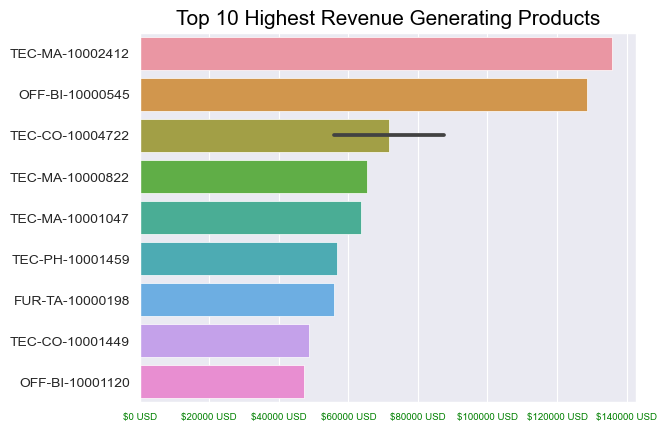

In [21]:
sns.barplot(data=top_10_highest_revenue_products, 
            x=top_10_highest_revenue_products["Order Total"],
            y=top_10_highest_revenue_products["Product Id"])    # building the barplot 
plt.title("Top 10 Highest Revenue Generating Products",
          color="black",
          fontsize=15)      # creating a title 
plt.ylabel("") 
plt.xlabel("")
usd = list(range(0, 160000, 20000))     # defining a variable for the values on the x-axis
plt.xticks(usd, [f"${u} USD" for u in usd],
           fontsize=7,
           color="green")      # usiing list comprehension to insert text in the x-axis
print("The bar graph below displays the top 10 products that generate the highest revenue.") 

2) Find the top 5 selling products in each region.

In [22]:
top_5_selling_products_central = orders[orders["Region"] == "Central"][["Region", "Sub Category", "Order Total"]].sort_values(by="Order Total", ascending=False).reset_index()[:5]      # creating a variable with the top 5 selling products in the central region
top_5_selling_products_south = orders[orders["Region"] == "South"][["Region", "Sub Category", "Order Total"]].sort_values(by="Order Total", ascending=False).reset_index()[:5]      # creating a variable with the top 5 selling products in the south region
top_5_selling_products_east = orders[orders["Region"] == "East"][["Region", "Sub Category", "Order Total"]].sort_values(by="Order Total", ascending=False).reset_index()[:5]        # creating a variable with the top 5 selling products in the east region
top_5_selling_products_west = orders[orders["Region"] == "West"][["Region", "Sub Category", "Order Total"]].sort_values(by="Order Total", ascending=False).reset_index()[:5]        # creating a variable with the top 5 selling products in the west region

top_5_selling_products_regions = pd.concat([top_5_selling_products_central, top_5_selling_products_west, top_5_selling_products_south, top_5_selling_products_east])    # storing the concated previous variables in a dataframe
top_5_selling_products_regions[["Region", "Sub Category", "Order Total"]]

,Region,Sub Category,Order Total
0,Central,Binders,128570
1,Central,Copiers,87500
2,Central,Machines,65280
3,Central,Binders,47250
4,Central,Copiers,34300
0,West,Copiers,56000
1,West,Accessories,43550
2,West,Tables,43320
3,West,Supplies,40950
4,West,Phones,33280


3) Find month over month growth comparison for 2022 and 2023 sales.

In [23]:
sales_2022 = orders[orders["Year"] == 2022].groupby(["Year", "Month Num", "Month"])["Order Total"].sum().reset_index()      # storing the 2022 total sales grouped by month in a variable
sales_2023 = orders[orders["Year"] == 2023].groupby(["Year", "Month Num", "Month"])["Order Total"].sum().reset_index()      # storing the 2023 total sales grouped by month in a variable

sales_2022.rename(columns={"Order Total": "2022 Order Total"}, inplace=True)    # renaming the order total column
sales_2023.rename(columns={"Order Total": "2023 Order Total"}, inplace=True)    # renaming the order total column

MoM_sales = pd.concat([sales_2022, sales_2023], axis=1)     # storing the concated sales variables in a dataframe
MoM_sales["2023 Total Diff"] = MoM_sales["2023 Order Total"] - MoM_sales["2022 Order Total"]    # creating a calculated column for the total difference of the year 2023

MoM_sales["2022 MoM Percentage"] = round(MoM_sales["2022 Order Total"].pct_change(periods=1) * 100, 2)      # creating a calculated column for the month over month growth percentage of the year 2022
MoM_sales["2023 MoM Percentage"] = round(MoM_sales["2023 Order Total"].pct_change(periods=1) * 100, 2)      # creating a calculated column for the month over month growth percentage of the year 2023

MoM_sales

,Year,Month Num,Month,2022 Order Total,Year,Month Num,Month,2023 Order Total,2023 Total Diff,2022 MoM Percentage,2023 MoM Percentage
0,2022,1,January,453990,2023,1,January,449590,-4400,NaN,NaN
1,2022,2,February,459760,2023,2,February,759820,300060,1.27,69.00
2,2022,3,March,408260,2023,3,March,407040,-1220,-11.20,-46.43
3,2022,4,April,494480,2023,4,April,562810,68330,21.12,38.27
4,2022,5,May,428560,2023,5,May,425390,-3170,-13.33,-24.42
5,2022,6,June,483010,2023,6,June,341030,-141980,12.71,-19.83
6,2022,7,July,389140,2023,7,July,436680,47540,-19.43,28.05
7,2022,8,August,554380,2023,8,August,481410,-72970,42.46,10.24
8,2022,9,September,450080,2023,9,September,434870,-15210,-18.81,-9.67
9,2022,10,October,625580,2023,10,October,650090,24510,38.99,49.49


4) For each category, which month had the highest sales.

In [24]:
highest_sales_by_month_furniture = orders[orders["Category"] == "Furniture"].groupby(["Category", "Month"])["Order Total"].sum().sort_values(ascending=False).reset_index()[:1]     # storing the highest sale month by furniture in a variable
highest_sales_by_month_office_supplies = orders[orders["Category"] == "Office Supplies"].groupby(["Category", "Month"])["Order Total"].sum().sort_values(ascending=False).reset_index()[:1]     # storing the highest sale month by office supplies in a variable
highest_sales_by_month_technology = orders[orders["Category"] == "Technology"].groupby(["Category", "Month"])["Order Total"].sum().sort_values(ascending=False).reset_index()[:1]       # storing the highest sale month by technology in a variable

highest_sales_month_by_category = pd.concat([highest_sales_by_month_furniture, highest_sales_by_month_office_supplies, highest_sales_by_month_technology])  # creating a dataframe for the highest sales months in each category
highest_sales_month_by_category

,Category,Month,Order Total
0,Furniture,February,425100
0,Office Supplies,February,463470
0,Technology,October,567800


The bar graph below displays the month that had the highest sales by category.


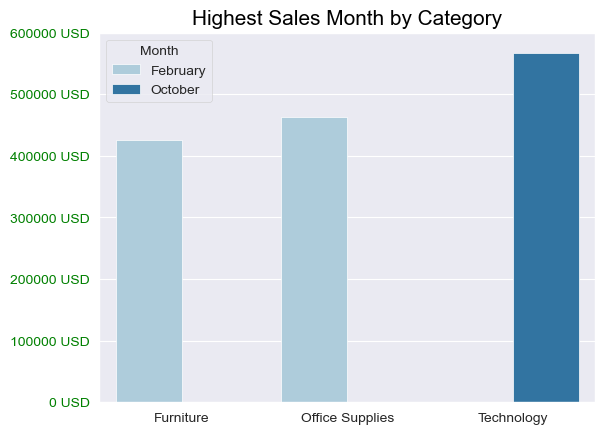

In [25]:
highest_sales_month_by_category_chart = sns.barplot(data=highest_sales_month_by_category,
                                                    y="Order Total",
                                                    x="Category",
                                                    hue="Month",
                                                    palette="Paired")       # building out the bar graph
plt.title("Highest Sales Month by Category",
          fontsize=15,
          color="black")        # creating setting for the title of the graph
yticks = list(range(0, 700000, 100000))     # creating new y-ticks for the y-axis
plt.yticks(yticks, [f"{y} USD" for y in yticks], 
           color="green")       # using a list comprehension to add the new y-ticks to the graph and change the color to green
plt.ylabel("") 
plt.xlabel("") 
print("The bar graph below displays the month that had the highest sales by category.") 

5) Which sub category had the highest growth by profit in 2023 compared to 2022?

In [26]:
# creating a dataframe for the years 2022, and 2023 with the values of highest order total by category
highest_growth_by_category_2022 = orders[orders["Year"] == 2022].groupby(["Year", "Sub Category"])["Order Total"].sum().reset_index()
highest_growth_by_category_2023 = orders[orders["Year"] == 2023].groupby(["Year", "Sub Category"])["Order Total"].sum().reset_index()   

# combining the above dataframes and storing them in a single dataframe and sorting the data so the years will be in ascending order (necessary for growth rate percentages)
highest_growth_profit_by_category = pd.concat([highest_growth_by_category_2022, highest_growth_by_category_2023])
highest_growth_profit_by_category = highest_growth_profit_by_category.sort_values(by=["Sub Category", "Year"], ascending=[True, True]) 
highest_growth_profit_by_category 

# calculating the growth rate for each sub category in 2023 compared to 2022. I did this step individually for each sub category to validate my answers and will use a for loop below to accomplish the same task
growth_percentage_accessories = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Accessories"].set_index("Year")
growth_percentage_accessories["Growth Percentage"] = round(growth_percentage_accessories["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_appliances = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Appliances"].set_index("Year")
growth_percentage_appliances["Growth Percentage"] = round(growth_percentage_appliances["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_art = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Art"].set_index("Year")
growth_percentage_art["Growth Percentage"] = round(growth_percentage_art["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_binders = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Binders"].set_index("Year")
growth_percentage_binders["Growth Percentage"] = round(growth_percentage_binders["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_bookcases = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Bookcases"].set_index("Year")
growth_percentage_bookcases["Growth Percentage"] = round(growth_percentage_bookcases["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_chairs = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Chairs"].set_index("Year")
growth_percentage_chairs["Growth Percentage"] = round(growth_percentage_chairs["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_copiers = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Copiers"].set_index("Year")
growth_percentage_copiers["Growth Percentage"] = round(growth_percentage_copiers["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_envelopes = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Envelopes"].set_index("Year")
growth_percentage_envelopes["Growth Percentage"] = round(growth_percentage_envelopes["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_fasteners = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Fasteners"].set_index("Year")
growth_percentage_fasteners["Growth Percentage"] = round(growth_percentage_fasteners["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_furnishings = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Furnishings"].set_index("Year")
growth_percentage_furnishings["Growth Percentage"] = round(growth_percentage_furnishings["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_labels = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Labels"].set_index("Year")
growth_percentage_labels["Growth Percentage"] = round(growth_percentage_labels["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_machines = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Machines"].set_index("Year")
growth_percentage_machines["Growth Percentage"] = round(growth_percentage_machines["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_paper = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Paper"].set_index("Year")
growth_percentage_paper["Growth Percentage"] = round(growth_percentage_paper["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_phones = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Phones"].set_index("Year")
growth_percentage_phones["Growth Percentage"] = round(growth_percentage_phones["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_storage = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Storage"].set_index("Year")
growth_percentage_storage["Growth Percentage"] = round(growth_percentage_storage["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_supplies = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Supplies"].set_index("Year")
growth_percentage_supplies["Growth Percentage"] = round(growth_percentage_supplies["Order Total"].pct_change(periods=1) * 100, 2)

growth_percentage_tables = highest_growth_profit_by_category[highest_growth_profit_by_category["Sub Category"] == "Tables"].set_index("Year")
growth_percentage_tables["Growth Percentage"] = round(growth_percentage_tables["Order Total"].pct_change(periods=1) * 100, 2)

In [27]:
categories = highest_growth_profit_by_category.reset_index()    # creating a variable to store the combined dataframes in that will be used to iterate through and find the growth percentage

for c in categories["index"]:   # creating a variable to store the combined dataframes in that will be used for iterate through and find the growth percentage
    if c == c:
        categories["growth"] = categories["Order Total"].pct_change(periods=1) * 100   # using a for loop to iterate through the data frame to calculate growth rate percentage for the year 2023
growth_categories = round(categories[categories["Year"] % 2 != 0], 2)
growth_categories

,index,Year,Sub Category,Order Total,growth
1,0,2023,Accessories,445830,2.83
3,1,2023,Appliances,173030,-53.73
5,2,2023,Art,63230,-13.38
7,3,2023,Binders,589500,39.38
9,4,2023,Bookcases,320870,16.00
11,5,2023,Chairs,861360,7.58
13,6,2023,Copiers,284440,-23.80
15,7,2023,Envelopes,36820,-1.39
17,8,2023,Fasteners,8590,-1.49
19,9,2023,Furnishings,200740,-20.58


Out of all the sub categories, supplies saw the highest growth percentag for the year 2023 with of 140.50%.


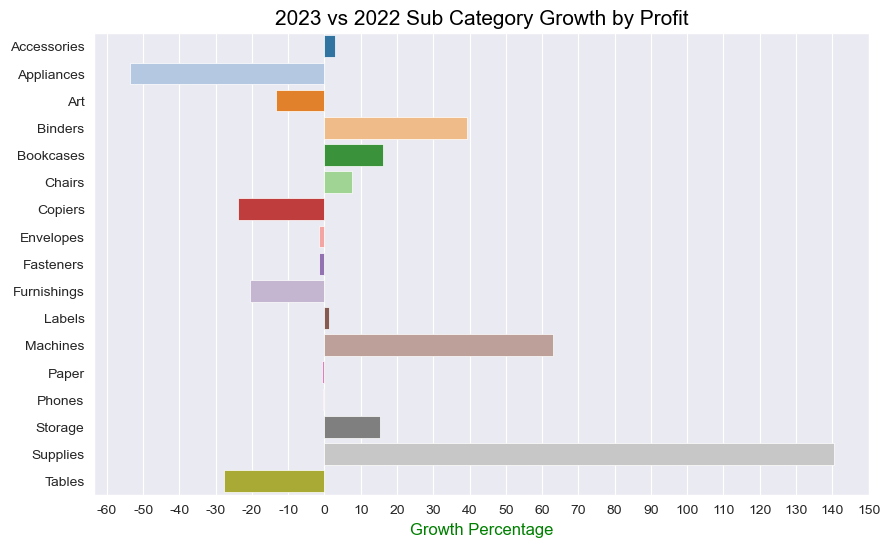

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=growth_categories,
            y=growth_categories["Sub Category"],
            x=growth_categories["growth"],
            palette="tab20")        # building out bar graph
plt.title("2023 vs 2022 Sub Category Growth by Profit",
          fontsize=15,
          color="black")        # customizing the title of the graph
plt.ylabel("") 
plt.xlabel("Growth Percentage",
           color="green")       # naming the x-axis and setting the color
xticks = list(range(-60, 160, 10))      # creating the numeric values that will be used as x-ticks on the plot
plt.xticks(xticks, [f"{x}" for x in xticks])        # creating a list comprehension to add the newly created numeric values to the x-ticks
print("Out of all the sub categories, supplies saw the highest growth percentag for the year 2023 with of 140.50%.") 